### K-means classifier with sklearn

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster

DEBUGGING=True

In [72]:
# Loading the data
customers = pd.read_csv('wholesale_customers.csv')
customers = customers.drop(['Channel','Region'], axis=1) # drop 'Channel' and 'Region' columns
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


#####  a) Create a table in the report with the mean and range [xjmin; xjmax] for each attribute j, where xij is the attribute j value of instance i and xmin;j ; xmax;j are the minimum and maximum attribute j values among all instances.

In [73]:
# Create the empty dataframe
row_names = ['mean', 'range']
col_names = customers.columns
df = pd.DataFrame(index=row_names, columns=col_names)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,NaN,NaN,NaN,NaN,NaN,NaN
range,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Populate the dataframe with means and ranges
for j in range(len(col_names)):
    df.iloc[0,j] = customers.iloc[:,j].mean()
    df.iloc[1,j] = [np.min(customers.iloc[:,j]), np.max(customers.iloc[:,j])]
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87
range,"[3, 112151]","[55, 73498]","[3, 92780]","[25, 60869]","[3, 40827]","[3, 47943]"


##### b) Run k-means with k = 3 and construct a scatterplot for each pair of attributes using Pyplot. Therefore, 15 scatter plots should be constructed in total. Different clusters should appear with different colors in the scatter plot. All scatter plots should be included in the report, using no more than two pages for them. What do you observe?

In [75]:
K=3 # number of clusters
print('Number of classes = {}'.format(K))
km = cluster.KMeans(n_clusters = K)
km.fit(customers)
if DEBUGGING:
    print ('cluster centres:')
    for k in range( K ):
        print ('c{} = [{:.2f} {:.2f} {:.2f} {:.2f} {:.2f}]'.format(k, km.cluster_centers_[k][0], km.cluster_centers_[k][1],
                km.cluster_centers_[k][2], km.cluster_centers_[k][3],km.cluster_centers_[k][4],km.cluster_centers_[k][5] )),
        #print 'clusters:'
        #for j in range( M ):
        #    print '[%0.f %0.f] -> c%0d' % ( X[j][0], X[j][1], km.labels_[j] )
    print('WC score = {:.0f}'.format( km.inertia_ ))

Number of classes = 3
cluster centres:
c0 = [8253.47 3824.60 5280.45 2572.66 1773.06]
c1 = [35941.40 6044.45 6288.62 6713.97 1039.67]
c2 = [8000.04 18511.42 27573.90 1996.68 12407.36]
WC score = 80332413843


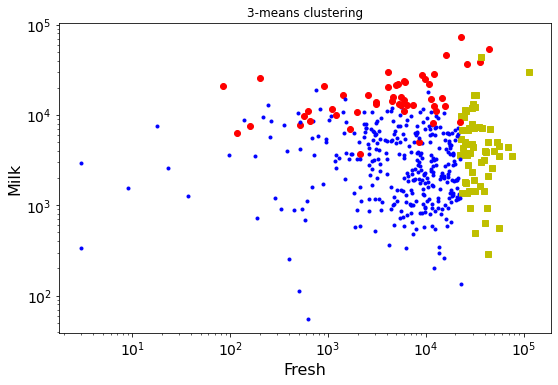

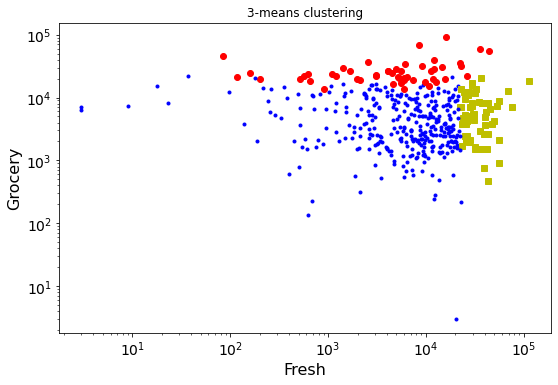

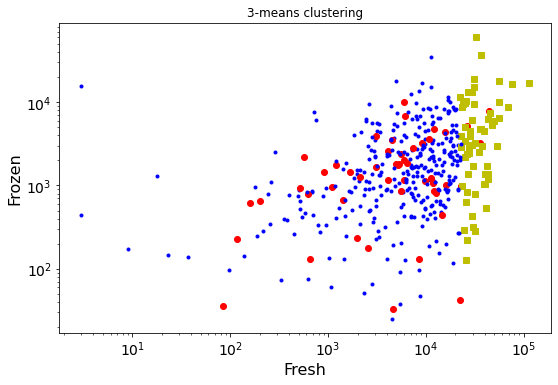

KeyboardInterrupt: 

In [80]:
#-plot clusters for K=3 defined above
from itertools import combinations
list=[0,1,2,3,4,5] # Create list of 6 for all the combinations of 6 attributes, 15 in total.
markers = ['b.', 'ys', 'ro', 'cv', 'ms', 'y1', 'k2', 'w3', 'b4', 'gp', 'r*', 'ch', 'm+', 'yD', 'k|']
subplot_no = []
for combo in combinations(list, 2):
    subplot_no.append(combo)
    plt.figure(figsize=(30,40))
    plt.subplot(6,3,subplot_no.index(combo)+1)
    for j in range(len(customers)):
        plt.plot(customers.iloc[j,combo[0]], customers.iloc[j,combo[1]], markers[km.labels_[j]] )
    plt.xscale('log') # logarithmic scaling for better illustration
    plt.yscale('log')
    plt.xlabel( str(col_names[combo[0]]), fontsize=16 )
    plt.ylabel( str(col_names[combo[1]]), fontsize=16 )
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('3-means clustering')
    #plt.savefig( 'km1-' + str( combo ) + '.png' )
    plt.show()

##### c) Run k-means for each possible value of k in the set f3; 5; 10g. Complete the following table with the between cluster distance BC, within cluster distance WC and ratio BC=WC of the set of clusters obtained for each k. Briefy comment on the obtained results.

In [47]:
# Creating an empty table with the below rows and columns
rows = ['BC', 'WC', 'BC/WC']
cols = ['k=3', 'k=5', 'k=10']
score_table = pd.DataFrame(index=rows, columns=cols)


K_list = [3,5,10]
for K in K_list: # number of clusters
    #WC = np.zeros( K+1 ) # inertia (within cluster)
    #BC = np.zeros( K+1 ) # between cluster
    km = cluster.KMeans(n_clusters = K)
    km.fit(customers)
    print('\nFor {}-Means clustering:'.format(K))
    print('WC score = {:.0f}'.format(km.inertia_))
    #WC[K] = km.inertia_
    score_table.iloc[1,K_list.index(K)]= km.inertia_
    
    #-compute the between-cluster score
    between = np.zeros(( K ))
    for i in range( K ): # loop through all clusters
        #between[i] = 0.0
        for l in range( i+1, K ): # loop through remaining clusters
            # tally the distance from this cluster centre to the centres of the remaining clusters
            between[i] += ( np.square( km.cluster_centers_[i][0]-km.cluster_centers_[l][0] ) 
                           + np.square( km.cluster_centers_[i][1]-km.cluster_centers_[l][1] )
                           + np.square( km.cluster_centers_[i][2]-km.cluster_centers_[l][2] )
                           + np.square( km.cluster_centers_[i][3]-km.cluster_centers_[l][3] )
                           + np.square( km.cluster_centers_[i][4]-km.cluster_centers_[l][4] )
                           + np.square( km.cluster_centers_[i][5]-km.cluster_centers_[l][5] ))
    #BC[K] = np.sum( between )
    score_table.iloc[0,K_list.index(K)]= np.sum(between)
    score_table.iloc[2,K_list.index(K)]= np.sum(between)/km.inertia_
    print('BC score = {:.0f}'.format(np.sum(between)))
    
    #-compute overall clustering score
    #score = BC[K] / WC[K]
    #print('Overall score ={:.4f}'.format(score))
    
score_table


For 3-Means clustering:
WC score = 80332413843
BC score = 3162657728

For 5-Means clustering:
WC score = 53116919401
BC score = 27275085126

For 10-Means clustering:
WC score = 29673646783
BC score = 177230279226


,k=3,k=5,k=10
BC,3.16266e+09,2.72751e+10,1.7723e+11
WC,8.03324e+10,5.31169e+10,2.96736e+10
BC/WC,0.0393696,0.513491,5.97265
